In [ ]:
pip install -r requirements.txt

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sharelib import *
import logging
from pathlib import Path
import json
import glob
import sys

logging.basicConfig(level=logging.WARN)
logger = logging.getLogger(__name__)

In [4]:
if __name__ == "__main__":
    df = pd.DataFrame()
    path_to_json = 'rawdata3' 
    json_pattern = os.path.join(path_to_json,'*.txt')
    file_list = glob.glob(json_pattern)
    
    xcount = 0

    for file in file_list:
        xcount = xcount + 1
        print("xcount: ", xcount)
        data = pd.read_json(file, lines=True)
        df = pd.concat([df,data], ignore_index = True)

xcount:  1


In [13]:
    print(np.get_printoptions())

    np.set_printoptions(threshold=sys.maxsize)
    print(np.get_printoptions())

    # ads_country_dst
    print("------------- ads_country_dst'].value_counts() ------------- ")    
    print(df['ads_country_dst'].value_counts())    
    print("------------- ads_country_dst'].value_counts() ------------- ")    


    dff = pd.DataFrame(
     [[13.72917, 100.52389],
     [13.2434, 100.12212],
     [1.234, 100.34344],
     [1.234, 10.34344],
     [1.234, 10.34344],
     [1.234, 10.34344],
     [1.234, 100.8],
     [1.234, 100.09],
     [1.234, 18.34344],
     [1.234, 19.34994],
     [13.675776, 100.423432]],
    columns=['LAT', 'LTT'])
    arr = dff.to_numpy()
    
    print('Numpy Array', arr)
    print('Numpy Array Datatype :', arr.dtype)

    # df_country = df["ads_country_dst"]
    
    # df_categories = pd.concat([df_country], axis=1, sort=False,)
    
    # print("-df_categories-")
    # print(df_categories)

    # X_label = df_categories.apply(LabelEncoder().fit_transform)
    # print(X_label.value_counts()) 

    # print("X_label.to_numpy()")
    # print(X_label.to_numpy())

{'edgeitems': 3, 'threshold': 9223372036854775807, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': False}
{'edgeitems': 3, 'threshold': 9223372036854775807, 'floatmode': 'maxprec', 'precision': 8, 'suppress': False, 'linewidth': 75, 'nanstr': 'nan', 'infstr': 'inf', 'sign': '-', 'formatter': None, 'legacy': False}
------------- ads_country_dst'].value_counts() ------------- 
10.0.0.0-10.255.255.255        8436
United States                   856
Thailand                        206
Austria                         195
China                            77
Netherlands                      60
Brazil                           44
Singapore                        22
172.16.0.0-172.31.255.255        22
Japan                            21
United Kingdom                   14
France                           13
Hong Kong                        12
Canada                           11
Korea Republic

C:\Users\sutee.k\AppData\Local\Temp\ipykernel_19428\527168922.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(arr[:, 0], arr[:, 1], c=None, cmap="flag", alpha=0.5)


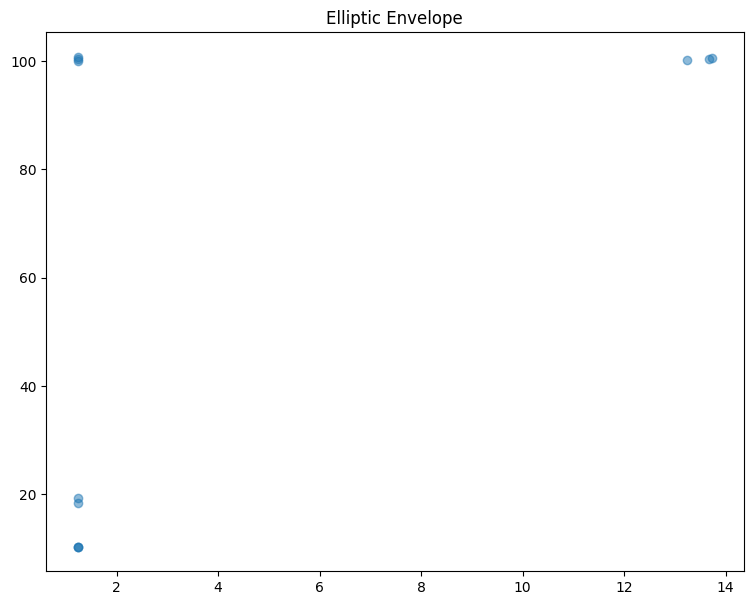

In [14]:
# Plot the data
plt.figure(figsize=(9,7))
plt.scatter(arr[:, 0], arr[:, 1], c=None, cmap="flag", alpha=0.5)
plt.title("IsolationForest")
plt.show()

In [15]:

print(arr)
if_detector = IsolationForest(n_estimators=10, contamination=0.01).fit(arr)
if_detect = if_detector.predict(arr)
print(if_detect)

[[ 13.72917  100.52389 ]
 [ 13.2434   100.12212 ]
 [  1.234    100.34344 ]
 [  1.234     10.34344 ]
 [  1.234     10.34344 ]
 [  1.234     10.34344 ]
 [  1.234    100.8     ]
 [  1.234    100.09    ]
 [  1.234     18.34344 ]
 [  1.234     19.34994 ]
 [ 13.675776 100.423432]]
[ 1 -1  1  1  1  1  1  1  1  1  1]


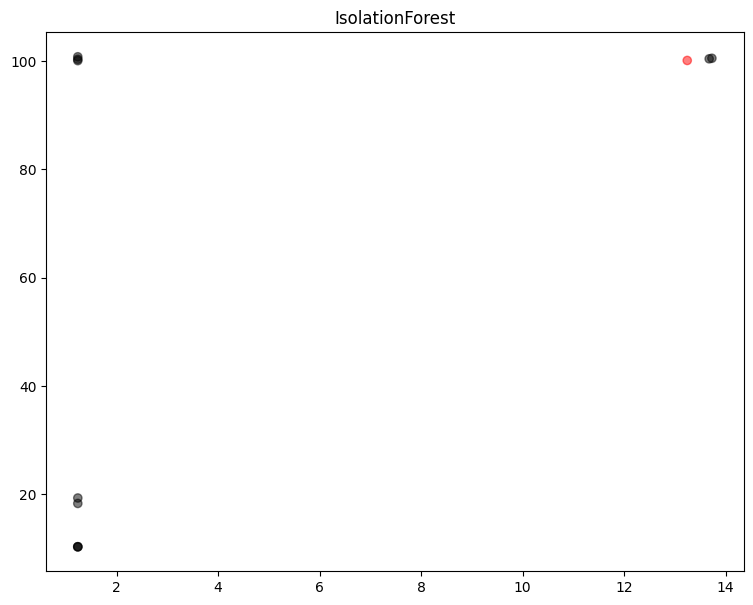

In [17]:
# Plot the data
plt.figure(figsize=(9,7))
plt.scatter(arr[:, 0], arr[:, 1], c=if_detect, cmap="flag", alpha=0.5)
plt.title("IsolationForest")
plt.show()

In [22]:
# Call and fit the Local Outlier Factor detector

lof_detector = LocalOutlierFactor(n_neighbors=3, contamination=0.1)
lof_detect = lof_detector.fit_predict(arr)
print(lof_detect)

[ 1  1  1  1  1  1  1  1  1 -1  1]


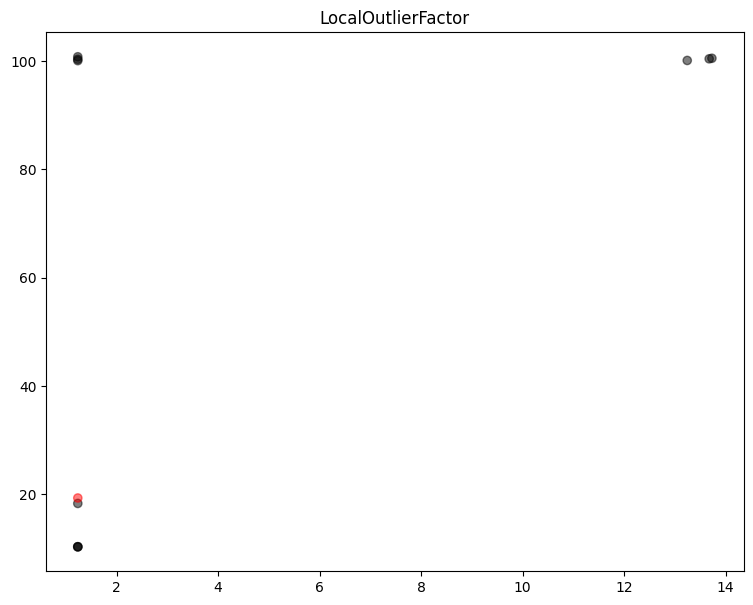

In [23]:
plt.figure(figsize=(9,7))
plt.scatter(arr[:, 0], arr[:, 1], c=lof_detect, cmap="flag", alpha=0.5)
plt.title("LocalOutlierFactor")
plt.show()

In [19]:
# Call and fit the One Class SVM detector
# X_new = np.array([[-1, 2],
#                  [-.1, 1]])
X_new = np.array([[13.72917, 100.52389],
                  [13.72917, 10.52389]])

svm_detector = OneClassSVM(tol=0.1, nu=0.1, gamma=0.1).fit(arr)
print(svm_detector)
svm_detect = svm_detector.predict(X_new)
print(svm_detect)

OneClassSVM(gamma=0.1, nu=0.1, tol=0.1)
[ 1 -1]
